Task 3.1

In [1]:
import tweepy
from tweepy import OAuthHandler

consumer_key = 'apVFqg1nQzntPQRtfnCcnKazl'
consumer_secret = 'uBFI5MQP74qD07IW5lSjwDaEe2QbWo1YHFHZTZrn8ZFTnRDD4j'
access_token = '831480969823715328-mdG8bdkqmfjGEtXSbER5FMAeHEOQ6eg'
access_secret = 'x4PeYShmCWcRL9xMbpx5BEjv8k5BovvJZx67HjGYUrBhp'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)


In [2]:
from tweepy import Stream
from tweepy.streaming import StreamListener
 
class MyListener(StreamListener):
 
    def on_data(self, data):
        try:
            with open('ArtificialIntelligenceTweets.json', 'a') as f:
                f.write(data)
                return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
 
    def on_error(self, status):
        print(status)
        return True
 
twitter_stream = Stream(auth, MyListener())
twitter_stream.filter(track=['ArtificialIntelligence'])

KeyboardInterrupt: 

Task 3.2: Analizing tweets - Counting terms

In [3]:
import json  
with open('ArtificialIntelligenceTweets.json','r') as json_file:
         for line in json_file:
             tweet = json.loads(line)
             print tweet["text"]
            

RT @NanaBiancaItaly: #Aws #AI workshop LIVE Now in cui il robot "diventa" intelligente grazie alle applicazioni di… 
RT @ProvidensAi: Hey @Ronald_vanLoon that's exactly what our #proptech startup uses. #machinelearning and #ai for home valuations. https://…
RT @InvestorIdeas: #Investorideas Reports: #ArtificialIntelligence #Stocks - The Opportunity &amp; #Market $EA,  $GOOGL,  $GOPH, $FB,  $IBM
htt…
RT @lisabriercliffe: Which deep learning network is best for you? https://t.co/yCXM11QsOQ #machinelearning #ai #artificialintelligence
RT @robmccargow: '#ArtificialIntelligence Versus the Worker'
by @zarkadakis
https://t.co/mtXLM5MENe
via @Disruptionhub #AI https://t.co/zOM…
RT @InvestorIdeas: #ArtificialIntelligence #Stock @breakingdataco  $BKD.V; $BKDCD Records 436%+ Across #GIVEMESPORT Key ( $FB) Metrics… 


In [4]:
import json
 
with open('ArtificialIntelligenceTweets.json', 'r') as f:
    line = f.readline() 
    tweet = json.loads(line) 
    print(json.dumps(tweet, indent=4)) 

{
    "contributors": null, 
    "truncated": false, 
    "text": "RT @NanaBiancaItaly: #Aws #AI workshop LIVE Now in cui il robot \"diventa\" intelligente grazie alle applicazioni di\u2026 ", 
    "is_quote_status": false, 
    "in_reply_to_status_id": null, 
    "id": 862980818377076736, 
    "favorite_count": 0, 
    "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>", 
    "retweeted": false, 
    "coordinates": null, 
    "timestamp_ms": "1494585635166", 
    "entities": {
        "user_mentions": [
            {
                "id": 708802639, 
                "indices": [
                    3, 
                    19
                ], 
                "id_str": "708802639", 
                "screen_name": "NanaBiancaItaly", 
                "name": "Nana Bianca"
            }
        ], 
        "symbols": [], 
        "hashtags": [
            {
                "indices": [
                    21, 
                    25
       

In [7]:
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

with open('ArtificialIntelligenceTweets.json', 'r') as f:
#import io
#f=io.open('data/stream_barcelona.json', 'r', encoding='utf8' )

     for line in f:
        tweet = json.loads(line)
        tokens = preprocess(tweet['text'])
        print(tokens)

[u'RT', u'@NanaBiancaItaly', u':', u'#Aws', u'#AI', u'workshop', u'LIVE', u'Now', u'in', u'cui', u'il', u'robot', u'"', u'diventa', u'"', u'intelligente', u'grazie', u'alle', u'applicazioni', u'di', u'\u2026']
[u'RT', u'@ProvidensAi', u':', u'Hey', u'@Ronald_vanLoon', u"that's", u'exactly', u'what', u'our', u'#proptech', u'startup', u'uses', u'.', u'#machinelearning', u'and', u'#ai', u'for', u'home', u'valuations', u'.', u'https', u':/', u'/', u'\u2026']
[u'RT', u'@InvestorIdeas', u':', u'#Investorideas', u'Reports', u':', u'#ArtificialIntelligence', u'#Stocks', u'-', u'The', u'Opportunity', u'&', u'amp', u';', u'#Market', u'$', u'EA', u',', u'$', u'GOOGL', u',', u'$', u'GOPH', u',', u'$', u'FB', u',', u'$', u'IBM', u'htt', u'\u2026']
[u'RT', u'@lisabriercliffe', u':', u'Which', u'deep', u'learning', u'network', u'is', u'best', u'for', u'you', u'?', u'https://t.co/yCXM11QsOQ', u'#machinelearning', u'#ai', u'#artificialintelligence']
[u'RT', u'@robmccargow', u':', u"'", u'#ArtificialInt

In [8]:
import operator 
import json
from collections import Counter

fname = 'ArtificialIntelligenceTweets.json'
with open(fname, 'r') as f:
   count_all = Counter()
   for line in f:
       tweet = json.loads(line)
       # Create a list with all the terms
       terms_all = [term for term in preprocess(tweet['text'])]
       # Update the counter
       count_all.update(terms_all)
   print(count_all.most_common(5))


[(u'$', 8), (u':', 7), (u'RT', 6), (u'\u2026', 5), (u',', 4)]


In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords") # download the stopword corpus on our computer
import string
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via', 'RT']
from collections import Counter


[nltk_data] Downloading package stopwords to /Users/sunce/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
import operator 
import json
from collections import Counter
 
fname = 'ArtificialIntelligenceTweets.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_stop = [term for term in preprocess(tweet['text']) if term not in stop]
        count_all.update(terms_stop)
    for word, index in count_all.most_common(5):
        print '%s : %s' % (word, index)

… : 5
#ArtificialIntelligence : 3
@InvestorIdeas : 2
#ai : 2
FB : 2


In [14]:
import operator 
import json
from collections import Counter
 
fname = 'ArtificialIntelligenceTweets.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_stop = [term for term in preprocess(tweet['text']) if term not in stop]
        terms_hash = [term for term in preprocess(tweet['text']) 
              if term.startswith('#')]
        count_all.update(terms_hash)
    for word, index in count_all.most_common(5):
        print '%s : %s' % (word, index)


#ArtificialIntelligence : 3
#AI : 2
#ai : 2
#machinelearning : 2
#GIVEMESPORT : 1


In [15]:
import operator 
import json
from collections import Counter
 
fname = 'ArtificialIntelligenceTweets.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_only = [term for term in preprocess(tweet['text']) 
              if term not in stop and
              not term.startswith(('#', '@'))] 
        count_all.update(terms_hash)
    for word, index in count_all.most_common(5):
        print '%s : %s' % (word, index)


#ArtificialIntelligence : 6
#GIVEMESPORT : 6
#Stock : 6


### Task 3.3: Case study

In [16]:
import operator 
import json
from collections import Counter
 
fname = 'Lab3.CaseStudy.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_hash = [term for term in preprocess(tweet['text']) if term.startswith('#') and term not in stop]        
        count_all.update(terms_hash)
# Print the first 10 most frequent words
print(count_all.most_common(15))

[(u'#Barcelona', 68), (u'#Messi', 30), (u'#FCBLive', 17), (u'#UDLasPalmas', 13), (u'#VamosUD', 13), (u'#barcelona', 10), (u'#CopaDelRey', 8), (u'#empleo', 6), (u'#BCN', 6), (u'#riesgoimpago', 6), (u'#news', 5), (u'#LaLiga', 5), (u'#SportsCenter', 4), (u'#LionelMessi', 4), (u'#Informe', 4)]


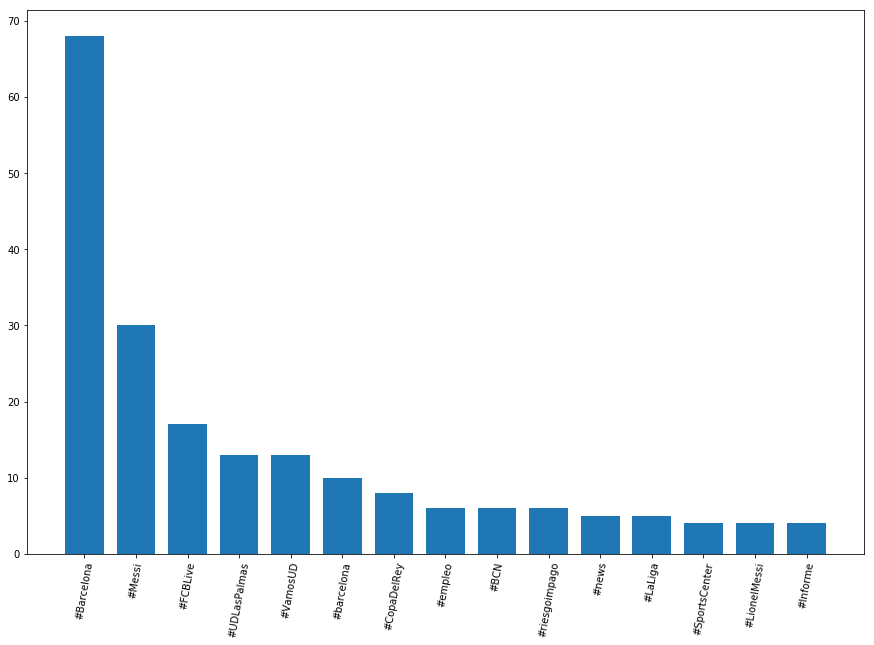

In [19]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,10)
import matplotlib.pyplot as plt

sorted_x, sorted_y = zip(*count_all.most_common(15))
#print(sorted_x, sorted_y)

plt.bar(range(len(sorted_x)), sorted_y, width=0.75, align='center');
plt.xticks(range(len(sorted_x)), sorted_x, rotation=80);
plt.axis('tight'); 

### Task 3.4: Student proposal